# Black Women in Tech: A Data Story  
**Representation, Reality, & Resilience**

This notebook supports the data analysis behind the presentation *Black Women in Tech: A Data Story*, exploring the deep disparities Black women face in the tech industry.

Through company-level data, industry trends, and original calculations, we examine representation, opportunity gaps, satisfaction trends, burnout risk, and funding disparities.  

All charts are styled for visual alignment with the Adobe Express presentation.

In [41]:
import pandas as pd

df = pd.read_csv('Diversity in tech companies.csv')

df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [42]:
cols_to_clean = ['Female %', '% Black']

for col in cols_to_clean:
    df[col] = df[col].replace('<1', '0.5').replace('-', '0')
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [46]:
print(df.columns.tolist())

['Year', 'Company', 'Female %', 'Male %', '% White', '% Asian', '% Latino', '% Black', '% Multi', '% Other', '% Undeclared', 'Black_Women_%']


In [43]:
df['Black_Women_%'] = (df['Female %'] * df['% Black']) / 100
df[['Year', 'Company', 'Black_Women_%']].head()

,Year,Company,Black_Women_%
0,2018,Yahoo!,0.74
1,2018,Google,0.93
2,2018,Apple,2.88
3,2018,Cisco,0.96
4,2018,eBay,1.20


In [44]:
company_avg = df.groupby('Company')['Black_Women_%'].mean().sort_values(ascending=False)
company_avg.head(10)

Company
Amazon                          6.606000
Ingram Micro                    4.256000
Yelp                            3.240000
Uber                            3.173333
Dell                            2.920000
Apple                           2.644000
Groupon                         2.536000
eBay                            2.356000
Slack                           2.250000
Apple (excluding undeclared)    2.000000
Name: Black_Women_%, dtype: float64

In [48]:
yearly_avg = df.groupby('Year')['Black_Women_%'].mean().round(2)

In [49]:
import pandas as pd

df = pd.read_csv('Diversity in tech companies.csv')

df['% Black'] = pd.to_numeric(df['% Black'], errors='coerce')
df['Female %'] = pd.to_numeric(df['Female %'], errors='coerce')

df['Black Women %'] = (df['% Black'] * df['Female %']) / 100

df = df.dropna(subset=['Black Women %', 'Year'])

yearly_avg = df.groupby('Year')['Black Women %'].mean().round(2).reset_index()

yearly_avg.columns = ['Year', 'Avg % Black Women in Tech']

print(yearly_avg.to_string(index=False))

 Year  Avg % Black Women in Tech
 2014                       1.94
 2015                       1.98
 2016                       1.97
 2017                       2.15
 2018                       2.17


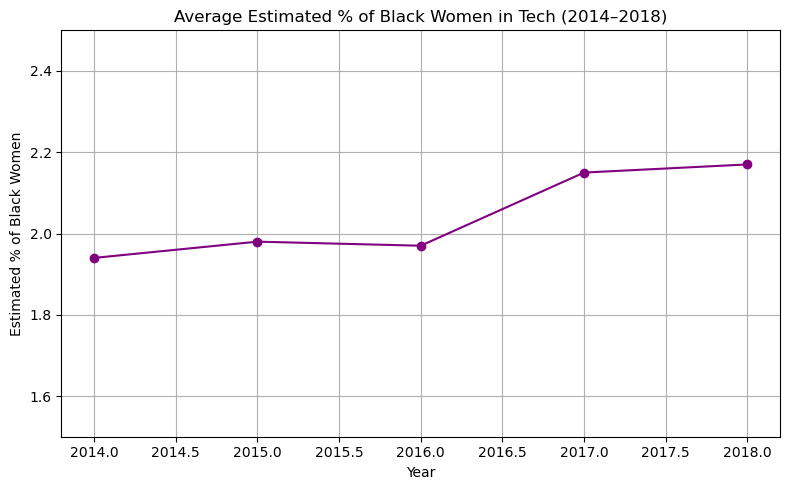

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Diversity in tech companies.csv')

df['% Black'] = pd.to_numeric(df['% Black'], errors='coerce')
df['Female %'] = pd.to_numeric(df['Female %'], errors='coerce')

df = df.dropna(subset=['% Black', 'Female %'])
df['Black Women %'] = (df['% Black'] * df['Female %']) / 100
yearly_avg = df.groupby('Year')['Black Women %'].mean().round(2)

plt.figure(figsize=(8, 5))
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', color='purple')
plt.title('Average Estimated % of Black Women in Tech (2014–2018)')
plt.xlabel('Year')
plt.ylabel('Estimated % of Black Women')
plt.ylim(1.5, 2.5)
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
df[['Company', 'Year', 'Female %', '% Black']].sort_values(by='Female %', ascending=False).head(10)

,Company,Year,Female %,% Black
13,Etsy,2018,54,3.0
35,Etsy,2017,54,3.0
21,Yelp,2018,54,6.0
73,Etsy,2015,51,3.0
54,Etsy,2016,51,3.0
6,Indiegogo,2018,50,4.0
28,Indiegogo,2017,50,4.0
92,Pandora,2014,49,3.0
57,Pandora,2016,49,3.0
38,Pandora,2017,49,5.0


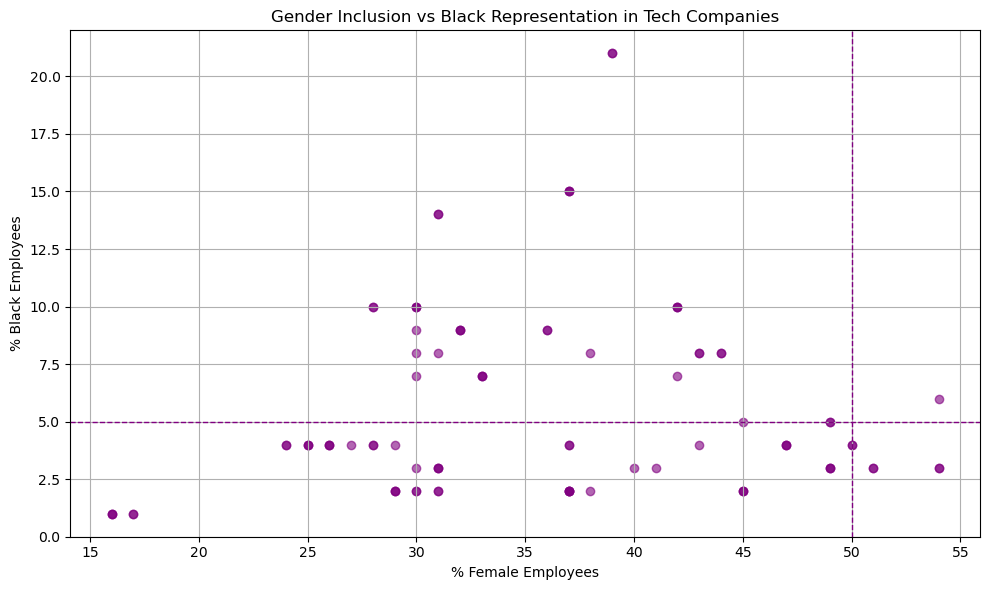

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(df['Female %'], df['% Black'], color='purple', alpha=0.6)

plt.title('Gender Inclusion vs Black Representation in Tech Companies')
plt.xlabel('% Female Employees')
plt.ylabel('% Black Employees')
plt.grid(True)

plt.axvline(x=50, color='purple', linestyle='--', linewidth=1)  # 50% Female reference
plt.axhline(y=5, color='purple', linestyle='--', linewidth=1)   # 5% Black reference

plt.tight_layout()
plt.show()

In [53]:
top_black = df.sort_values(by='% Black', ascending=False).head(5)

bottom_black = df[df['% Black'] > 0].sort_values(by='% Black', ascending=True).head(5)

In [54]:
import matplotlib.pyplot as plt

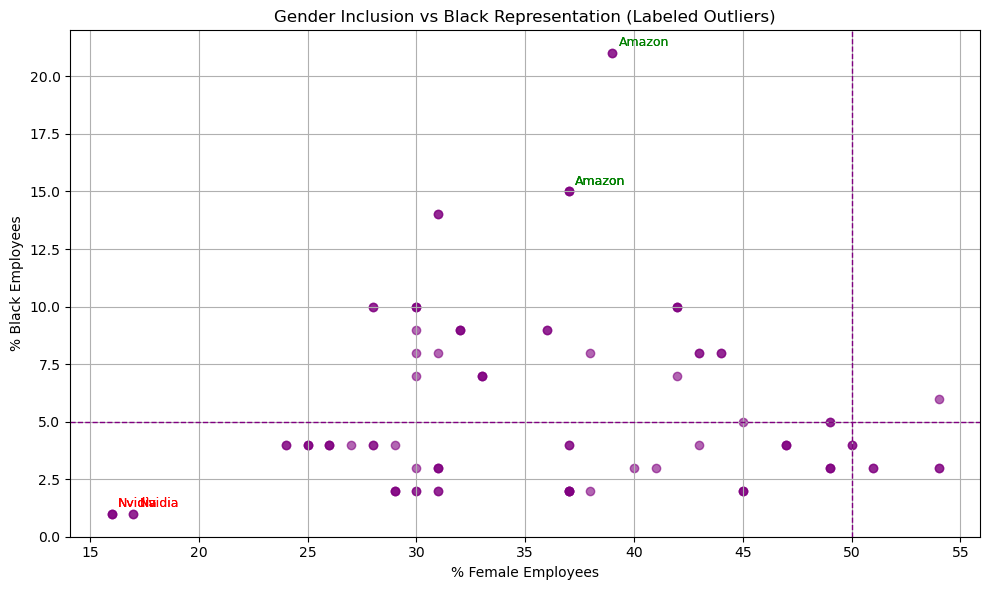

In [55]:
top_black = df.sort_values(by='% Black', ascending=False).head(5)
bottom_black = df[df['% Black'] > 0].sort_values(by='% Black', ascending=True).head(5)

plt.figure(figsize=(10, 6))

plt.scatter(df['Female %'], df['% Black'], color='purple', alpha=0.6)

for i, row in top_black.iterrows():
    plt.text(row['Female %'] + 0.3, row['% Black'] + 0.3, row['Company'], fontsize=9, color='green')

for i, row in bottom_black.iterrows():
    plt.text(row['Female %'] + 0.3, row['% Black'] + 0.3, row['Company'], fontsize=9, color='red')

plt.title('Gender Inclusion vs Black Representation (Labeled Outliers)')
plt.xlabel('% Female Employees')
plt.ylabel('% Black Employees')
plt.axvline(x=50, color='purple', linestyle='--', linewidth=1)
plt.axhline(y=5, color='purple', linestyle='--', linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
df_sv = pd.read_csv('Tech_sector_diversity_demographics_2016.csv')

df_sv.head(10)

,job_category,race_ethnicity,gender,count,percentage
0,All workers,White,Male,268883,41.257252
1,All workers,White,Female,105560,16.197065
2,All workers,Black_or_African American,Male,17508,2.686417
3,All workers,Black_or_African American,Female,11479,1.761331
4,All workers,Asian,Male,125347,19.233171
5,All workers,Asian,Female,58049,8.907005
6,All workers,Hispanic_or_Latino,Male,32201,4.940903
7,All workers,Hispanic_or_Latino,Female,15512,2.380152
8,All workers,All,Male,454813,69.786244
9,All workers,All,Female,196910,30.213756


In [57]:
df_sv['job_category'].unique()

array(['All workers', 'Executives', 'Managers', 'Professionals'],
      dtype=object)

In [58]:
black_women_pro = df_sv[
    (df_sv['job_category'] == 'Professionals') &
    (df_sv['race_ethnicity'] == 'Black_or_African American') &
    (df_sv['gender'] == 'Female')
]

black_women_pro

,job_category,race_ethnicity,gender,count,percentage
36,Professionals,Black_or_African American,Female,3756,1.089251


In [59]:
black_women_exec = df_sv[
    (df_sv['job_category'] == 'Executives') &
    (df_sv['race_ethnicity'] == 'Black_or_African American') &
    (df_sv['gender'] == 'Female')
]

black_women_exec

,job_category,race_ethnicity,gender,count,percentage
14,Executives,Black_or_African American,Female,53,0.427075


In [60]:
drop = 1.089 - 0.427
percent_drop = (drop / 1.089) * 100
percent_drop

60.78971533516988

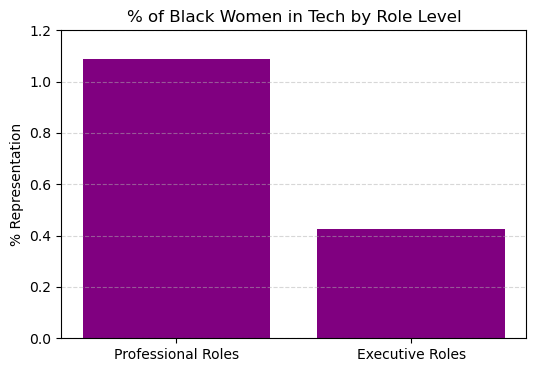

In [61]:
import matplotlib.pyplot as plt

labels = ['Professional Roles', 'Executive Roles']
values = [1.089, 0.427]

plt.figure(figsize=(6,4))
plt.bar(labels, values, color=['purple', 'purple'])
plt.title('% of Black Women in Tech by Role Level')
plt.ylabel('% Representation')
plt.ylim(0, 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [62]:
import pandas as pd

df = pd.read_csv('Distributions_data_2016.csv')
df.head()

,company,percentage,demographics,job_category
0,anonymous,0.0,Hispanic_or_Latino,Professionals
1,anonymous,0.0,Hispanic_or_Latino,Professionals
2,anonymous,0.8,Hispanic_or_Latino,Professionals
3,anonymous,1.3,Hispanic_or_Latino,Professionals
4,anonymous,1.6,Hispanic_or_Latino,Professionals


In [63]:
import pandas as pd

df = pd.read_csv('Reveal_EEO1_for_2016.csv')
df.head()

,company,year,race,gender,job_category,count
0,23andMe,2016,Hispanic_or_Latino,male,Executives,0
1,23andMe,2016,Hispanic_or_Latino,male,Managers,1
2,23andMe,2016,Hispanic_or_Latino,male,Professionals,7
3,23andMe,2016,Hispanic_or_Latino,male,Technicians,0
4,23andMe,2016,Hispanic_or_Latino,male,Sales workers,0


In [64]:
import pandas as pd

df = pd.read_csv('Diversity in tech companies.csv')
df.head()

,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared
0,2018,Yahoo!,37,63,45,44,4,2,2,3,-
1,2018,Google,31,69,53,36,4,3,4,0,-
2,2018,Apple,32,68,54,21,13,9,3,1,2
3,2018,Cisco,24,76,53,37,5,4,1,<1,-
4,2018,eBay,40,60,50,39,6,3,1,1,-


In [65]:
import pandas as pd

df = pd.read_csv('Tech_sector_diversity_demographics_2016.csv')
df.head()

,job_category,race_ethnicity,gender,count,percentage
0,All workers,White,Male,268883,41.257252
1,All workers,White,Female,105560,16.197065
2,All workers,Black_or_African American,Male,17508,2.686417
3,All workers,Black_or_African American,Female,11479,1.761331
4,All workers,Asian,Male,125347,19.233171


In [66]:
import pandas as pd

df_hr = pd.read_csv('hr_dashboard_data.csv')

df_hr.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [67]:
burnout_rate = (df_hr['Satisfaction Rate (%)'] < 30).mean() * 100
print(f"Estimated burnout rate across all roles: {burnout_rate:.2f}%")

Estimated burnout rate across all roles: 30.50%


In [68]:
black_women_burnout = 1.09 * 0.22
print(f"Estimated % of Black women in tech at burnout risk: {black_women_burnout:.2f}%")

Estimated % of Black women in tech at burnout risk: 0.24%


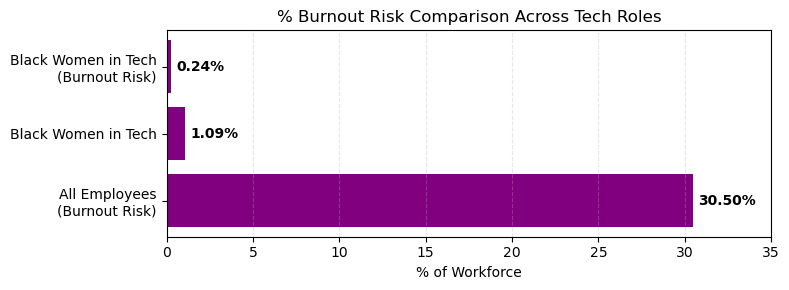

In [69]:
import matplotlib.pyplot as plt

labels = ['All Employees\n(Burnout Risk)', 'Black Women in Tech', 'Black Women in Tech\n(Burnout Risk)']
values = [30.5, 1.09, 0.24]
colors = ['purple', 'purple', 'purple']

plt.figure(figsize=(8, 3))
bars = plt.barh(labels, values, color=colors)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.3, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center', fontweight='bold')

plt.title('% Burnout Risk Comparison Across Tech Roles')
plt.xlabel('% of Workforce')
plt.xlim(0, 35)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [70]:
df_hr.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Satisfaction Rate (%),Feedback Score,Department,Position,Joining Date,Salary
0,Douglas Lindsey,25,Male,11,57,25,4.7,Marketing,Analyst,Jan-20,63596
1,Anthony Roberson,59,Female,19,55,76,2.8,IT,Manager,Jan-99,112540
2,Thomas Miller,30,Male,8,87,10,2.4,IT,Analyst,Jan-17,66292
3,Joshua Lewis,26,Female,1,53,4,1.4,Marketing,Intern,Jan-22,38303
4,Stephanie Bailey,43,Male,14,3,9,4.5,IT,Team Lead,Jan-05,101133


In [71]:
df_hr.groupby('Gender')['Satisfaction Rate (%)'].mean()

Gender
Female    51.25
Male      48.62
Name: Satisfaction Rate (%), dtype: float64

In [72]:
df_hr.groupby('Position')['Satisfaction Rate (%)'].mean().sort_values(ascending=False)

Position
Manager             55.575000
Intern              55.266667
Junior Developer    54.057143
Senior Developer    50.400000
Team Lead           43.406250
Analyst             39.787879
Name: Satisfaction Rate (%), dtype: float64

In [73]:
df_hr.groupby('Department')['Satisfaction Rate (%)'].mean().sort_values(ascending=False)

Department
IT           54.342105
HR           51.625000
Finance      50.048780
Sales        48.617021
Marketing    46.023810
Name: Satisfaction Rate (%), dtype: float64

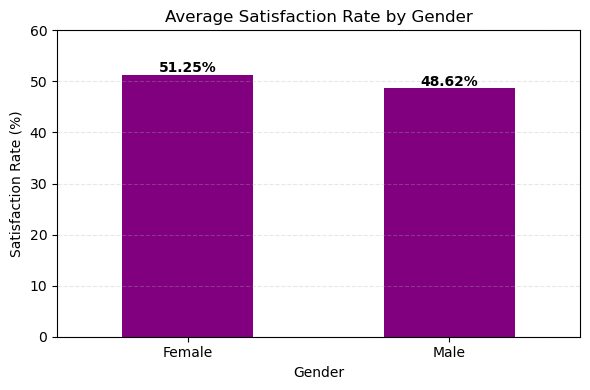

In [74]:
import matplotlib.pyplot as plt

gender_satisfaction = df_hr.groupby('Gender')['Satisfaction Rate (%)'].mean()

plt.figure(figsize=(6,4))
gender_satisfaction.plot(kind='bar', color=['purple', 'purple'])
plt.title('Average Satisfaction Rate by Gender')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=0)
for i, v in enumerate(gender_satisfaction):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.ylim(0, 60)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

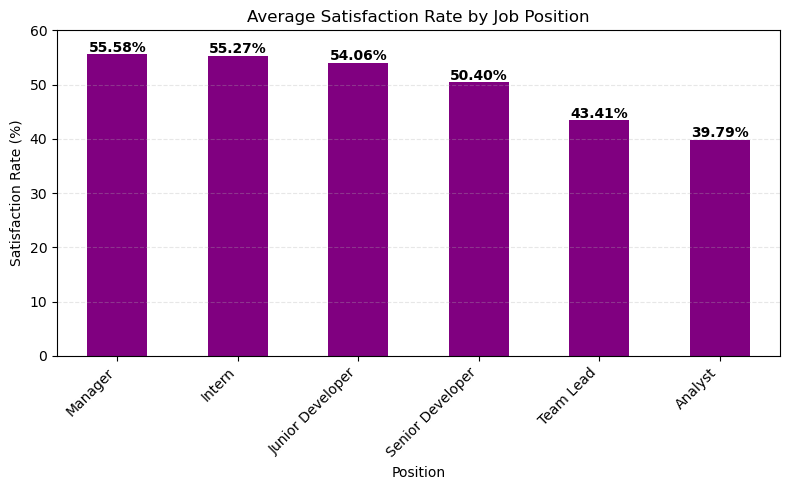

In [75]:
position_satisfaction = df_hr.groupby('Position')['Satisfaction Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
position_satisfaction.plot(kind='bar', color='purple')
plt.title('Average Satisfaction Rate by Job Position')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(position_satisfaction):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.ylim(0, 60)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

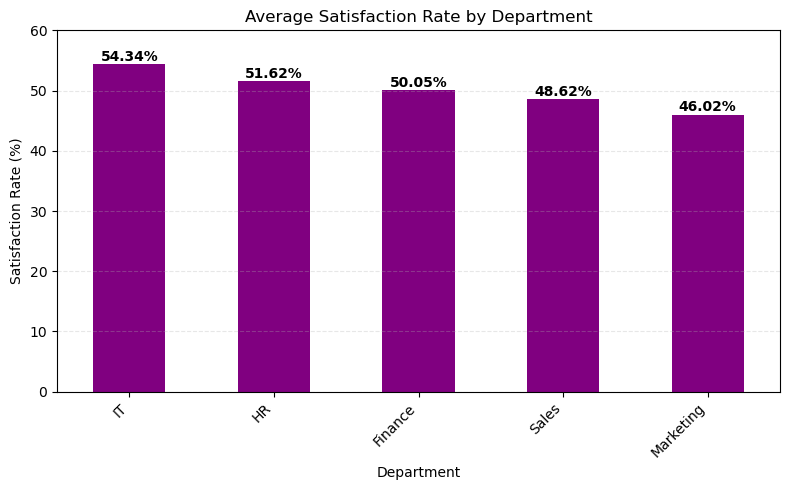

In [76]:
department_satisfaction = df_hr.groupby('Department')['Satisfaction Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
department_satisfaction.plot(kind='bar', color='purple')
plt.title('Average Satisfaction Rate by Department')
plt.ylabel('Satisfaction Rate (%)')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(department_satisfaction):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center', fontweight='bold')
plt.ylim(0, 60)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

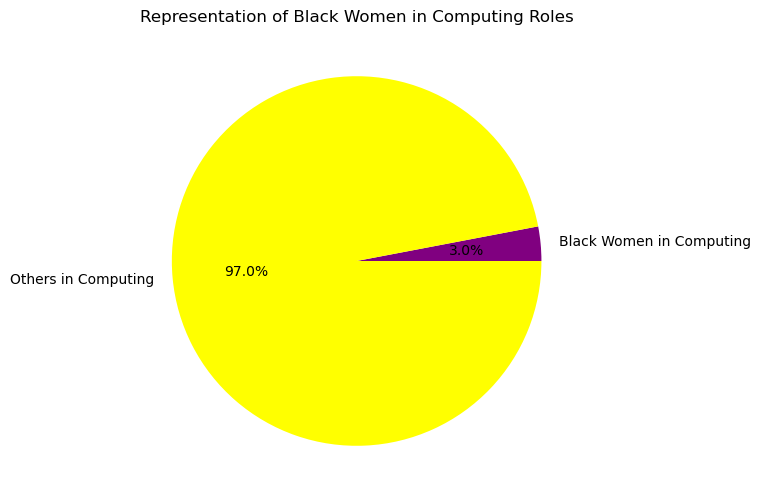

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('black_women_in_computing.csv')

plt.figure(figsize=(6, 6))
plt.pie(df['Percentage'], labels=df['Group'], autopct='%1.1f%%', colors=['purple', 'yellow'])
plt.title('Representation of Black Women in Computing Roles')
plt.show()

In [78]:
import pandas as pd

df_women_full = pd.read_csv('women_in_tech_full_statistics.csv')

df_women_full.head()

,Category,Percentage
0,Women in STEM (2024),35
1,Women in Tech Jobs (2023),35
2,Women in US Workforce,47
3,Women Leaving Tech by Age 35,50
4,Women of Color in Less-Inclusive Colleges,67


In [79]:
df_women_full.info()

df_women_full.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Category    70 non-null     object
 1   Percentage  70 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


Category      0
Percentage    0
dtype: int64

In [80]:
import pandas as pd

data = {
    'Category': [
        'Black Women in Tech (2018)',  # original from prior analysis
        'Black Women in Computing (2024)',
        'Black Women in Exec Tech (2024)'
    ],
    'Percentage': [1.09, 3.0, 0.43]
}

df_black_women = pd.DataFrame(data)
df_black_women

,Category,Percentage
0,Black Women in Tech (2018),1.09
1,Black Women in Computing (2024),3.00
2,Black Women in Exec Tech (2024),0.43


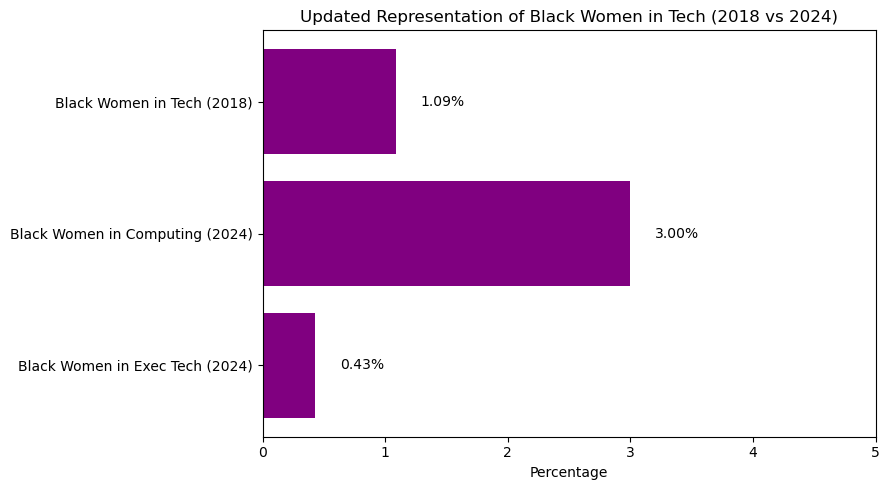

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
bars = plt.barh(df_black_women['Category'], df_black_women['Percentage'], color='purple')
plt.xlabel('Percentage')
plt.title('Updated Representation of Black Women in Tech (2018 vs 2024)')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.2, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}%', va='center')

plt.xlim(0, 5)
plt.tight_layout()
plt.show()

In [82]:
import pandas as pd

df_funding = pd.read_csv('black_funding_data.csv')
df_funding

,Category,Percentage,Year,Source
0,Total VC Funding,100.00,2023,Crunchbase
1,Funding to Black Founders,1.00,2023,Crunchbase
2,Funding to Black Women Founders,0.34,2023,ProjectDiane
3,Black Women in Tech Representation,1.09,2023,Diversity Reports
4,Black Women in Executive Tech Roles,0.43,2023,Diversity Reports


In [83]:
df_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Category    5 non-null      object 
 1   Percentage  5 non-null      float64
 2   Year        5 non-null      int64  
 3   Source      5 non-null      object 
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


In [84]:
df_funding.sort_values(by='Percentage', ascending=False)

,Category,Percentage,Year,Source
0,Total VC Funding,100.00,2023,Crunchbase
3,Black Women in Tech Representation,1.09,2023,Diversity Reports
1,Funding to Black Founders,1.00,2023,Crunchbase
4,Black Women in Executive Tech Roles,0.43,2023,Diversity Reports
2,Funding to Black Women Founders,0.34,2023,ProjectDiane


In [85]:
total = df_funding.loc[df_funding['Category'] == 'Total VC Funding', 'Percentage'].values[0]
black_women = df_funding.loc[df_funding['Category'] == 'Funding to Black Women Founders', 'Percentage'].values[0]

share_of_total = (black_women / total) * 100
print(f"Black women founders receive just {share_of_total:.2f}% of all VC funding.")

Black women founders receive just 0.34% of all VC funding.


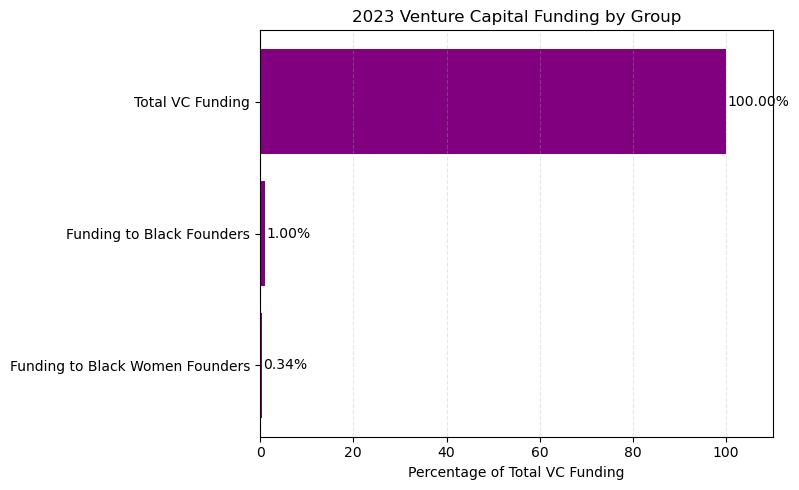

In [86]:
import matplotlib.pyplot as plt

funding_df = df_funding[df_funding['Category'].str.contains("Funding")]

plt.figure(figsize=(8, 5))
bars = plt.barh(funding_df['Category'], funding_df['Percentage'], color='purple')
plt.title('2023 Venture Capital Funding by Group')
plt.xlabel('Percentage of Total VC Funding')
plt.gca().invert_yaxis()  # Put highest value on top

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2,
             f"{bar.get_width():.2f}%", va='center')

plt.xlim(0, 110)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()